# Geerstma (1973) model

This model computes the stresses associated with a step change in pore pressure in a cylindrical reservoir embedded in an elastic half-space. 


In [29]:
from matplotlib import rcParams
rcParams['font.family'] = 'Avenir'
rcParams['font.size'] = 18
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import scipy.special as sp

## Constants

In [6]:
nu = 0.25               # Poisson's ratio
alpha = 1               # Biot coefficient
R = 1000                # Aquifer radius [m]
d = 5                   # Aquifer depth from ice surface to water table [m]
b = 25                  # Aquifer thickness [m]
c = d + b/2             # Depth of aquifer center [m]
rho = 1000              # Water density [kg/m^3]
g = 10                  # Gravitational constant [m/s^2]
delta_p = 0.5*rho*g*b   # Change in pore water pressure [Pa]

17.5

## Spatial domain and stress variables

In [8]:
r = np.arange(0.1,2000,20)
z = np.arange(0.1,200,10)

sigma_rr = np.empty([r.shape[0],z.shape[0]])
sigma_phi_phi = np.empty([r.shape[0],z.shape[0]])

## Compute stresses

``integrate.quad`` is running quite slow here because I had to increase the limit (upper bound on the number of subintervals used in the adaptive algorithm) from the default 50 to 1000 and decrease epsabs (absolute error tolerance) from the default 1.49e-8 to 1e-10 in order for the integrals to more or less converge (there are still a few "glitches" visible in the stress plots).

In [41]:
for i in np.arange(r.shape[0]):
    print(i)
    for j in np.arange(z.shape[0]):
        if z[j]>c:
            epsilon = -1
        else:
            epsilon = 1
        
        q_alt = -epsilon*(z[j]-c)
        q = z[j]+c
        I_1,err = integrate.quad(lambda x: np.exp(-q_alt*x)*x*sp.jv(1,x*R)*sp.jv(0,x*r[i]),0,np.inf,limit = 1000,epsabs=1e-10)
        I_2,err = integrate.quad(lambda x: np.exp(-q*x)*x*sp.jv(1,x*R)*sp.jv(0,x*r[i]),0,np.inf,limit = 10000,epsabs=1e-10)
        I_3,err = integrate.quad(lambda x: np.exp(-q*x)*(x**2)*sp.jv(1,x*R)*sp.jv(0,x*r[i]),0,np.inf,limit = 1000,epsabs=1e-10)
        I_4,err = integrate.quad(lambda x: np.exp(-q_alt*x)*sp.jv(1,x*R)*sp.jv(1,x*r[i]),0,np.inf,limit = 1000,epsabs=1e-10)
        I_5,err = integrate.quad(lambda x: np.exp(-q*x)*sp.jv(1,x*R)*sp.jv(1,x*r[i]),0,np.inf,limit = 1000,epsabs=1e-10)
        I_6,err = integrate.quad(lambda x: np.exp(-q*x)*x*sp.jv(1,x*R)*sp.jv(1,x*r[i]),0,np.inf,limit = 1000,epsabs=1e-10)
                
        sigma_rr[i,j] = alpha*(1-2*nu)/(2*(1-nu))*R*b*delta_p*((I_1+3*I_2-2*z[j]*I_3)-(1/r[i])*(I_4+(3-4*nu)*I_5-2*z[j]*I_6));
        sigma_phi_phi[i,j] = alpha*(1-2*nu)/(2*(1-nu))*R*b*delta_p*(4*nu*I_2+1/r[i]*(I_4+(3-4*nu)*I_5-2*z[j]*I_6));

0


/var/folders/vr/ys7d0t4j1_dcz_mxm3yz09v40000gn/T/ipykernel_5984/1539159220.py:11: IntegrationWarning: The maximum number of subdivisions (1000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_1,err = integrate.quad(lambda x: np.exp(-q_alt*x)*x*sp.jv(1,x*R)*sp.jv(0,x*r[i]),0,np.inf,limit = 1000,epsabs=1e-10)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


/var/folders/vr/ys7d0t4j1_dcz_mxm3yz09v40000gn/T/ipykernel_5984/1539159220.py:14: IntegrationWarning: The maximum number of subdivisions (1000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I_4,err = integrate.quad(lambda x: np.exp(-q_alt*x)*sp.jv(1,x*R)*sp.jv(1,x*r[i]),0,np.inf,limit = 1000,epsabs=1e-10)


29
30
31
32
33
34


/var/folders/vr/ys7d0t4j1_dcz_mxm3yz09v40000gn/T/ipykernel_5984/1539159220.py:13: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I_3,err = integrate.quad(lambda x: np.exp(-q*x)*(x**2)*sp.jv(1,x*R)*sp.jv(0,x*r[i]),0,np.inf,limit = 1000,epsabs=1e-10)


35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


## Plots

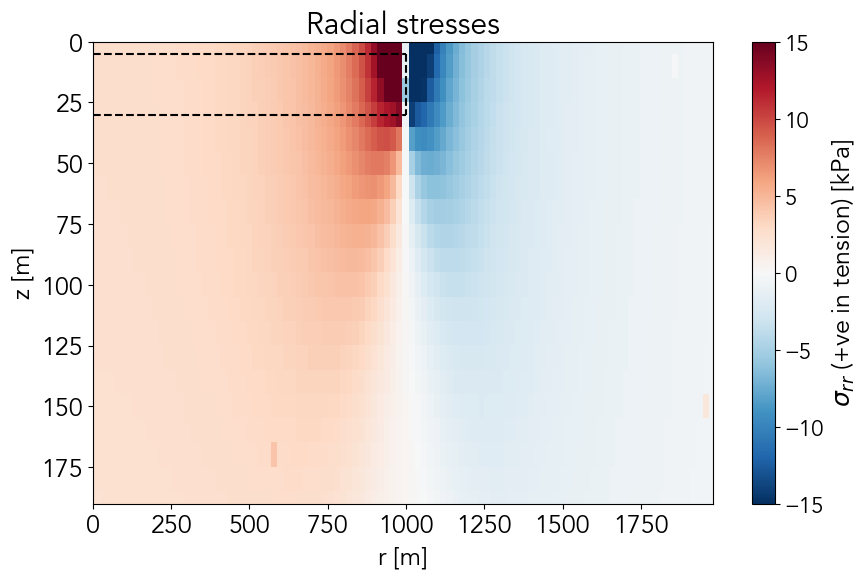

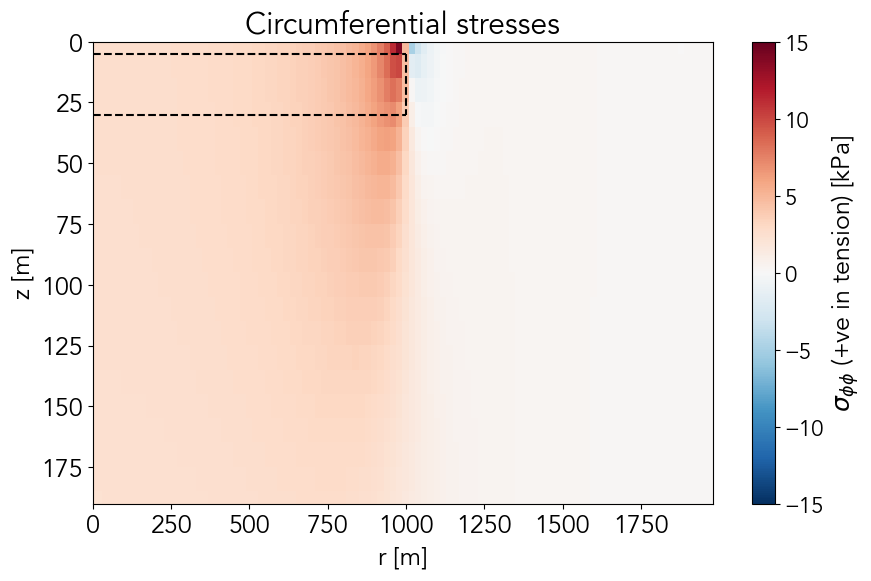

In [44]:
fig, ax = plt.subplots(figsize = (10,6))

plt.pcolor(r,z,np.transpose(sigma_rr)/1e3,cmap="RdBu_r",vmin = -15, vmax = 15)
cb = plt.colorbar(ax=ax)
cb.set_label(label="$\sigma_{rr}$ (+ve in tension) [kPa]")
cb.ax.tick_params(labelsize=16)

plt.plot([0,R],[d,d],'--k')
plt.plot([0,R],[d+b, d+b],'--k')
plt.plot([R,R],[d, d+b],'--k')

ax.set_xlabel("r [m]")
ax.set_ylabel("z [m]")
ax.set_title("Radial stresses")
plt.xlim(0,np.max(r))
plt.ylim(np.max(z),0)

plt.show()

fig, ax = plt.subplots(figsize = (10,6))

plt.pcolor(r,z,np.transpose(sigma_phi_phi)/1e3,cmap="RdBu_r",vmin = -15, vmax = 15)
cb = plt.colorbar(ax=ax)
cb.set_label(label="$\sigma_{\phi\phi}$ (+ve in tension) [kPa]")
cb.ax.tick_params(labelsize=16)

plt.plot([0,R],[d,d],'--k')
plt.plot([0,R],[d+b, d+b],'--k')
plt.plot([R,R],[d, d+b],'--k')

ax.set_xlabel("r [m]")
ax.set_ylabel("z [m]")
ax.set_title("Circumferential stresses")
plt.xlim(0,np.max(r))
plt.ylim(np.max(z),0)

plt.show()